In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Full Leaf Battery Survey Data
##### 648 vehicles reported. How does range change over the first few years of car ownership?

In [4]:
surveys = pd.read_csv('../data/leaf.txt', sep='\t', lineterminator='\n')
surveys

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,...,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
0,1264,622,09/18/2019 21:27,2015,LEAF SV,United States,2/2015,2/2018,t,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1269,623,11/30/2019 06:17,2018,LEAF SV,United States,3/2018,5/2018,t,VT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1274,624,03/03/2020 12:21,2018,LEAF S,United States,8/2018,9/2018,t,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1275,625,03/03/2020 13:17,2014,LEAF SV,United States,1/2014,3/2014,f,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325,626,08/18/2021 19:59,2012,LEAF SV,United States,4/2012,9/2019,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1273,612,02/26/2020 18:27,2018,LEAF SL,United States,8/2018,9/2018,t,DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,1321,651,02/28/2021 16:45,2014,LEAF SL Plus,Norway,3/2014,1/2021,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,1322,551,06/18/2021 15:04,2011,LEAF SL,United States,10/2010,10/2014,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,1327,652,12/25/2021 08:57,2019,LEAF S,United States,3/2019,7/2019,t,HI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure what a Nissan Battery Report is.


In [5]:
surveys.keys()

Index(['report_id', 'vehicle_id', 'date_submit', 'model_year', 'model',
       'country', 'date_built', 'date_acquired', 'qc_port', 'state', 'city',
       'postal_code', 'odometer', 'unit_distance', 'capacity_bars',
       'perceived_range', 'perceived_range_text', 'soc_meter', 'gids_80',
       'gids_100', 'ah_pack', 'soh', 'hx', 'bar_11_date', 'bar_11_odometer',
       'bar_10_date', 'bar_10_odometer', 'bar_9_date', 'bar_9_odometer',
       'bar_8_date', 'bar_8_odometer', 'bar_7_date', 'bar_7_odometer',
       'batt_swapped', 'batt_swap_count', 'batt_swap_warranty',
       'dist_batt_swap', 'date_batt_swap', 'bars_batt_swap', 'gids_batt_swap',
       'ah_batt_swap', 'soh_batt_swap', 'charge_method', 'charge_method_text',
       'range_charge_frequency', 'range_charge_frequency_text',
       'standard_charge_frequency', 'standard_charge_frequency_text',
       'topoff_charge_frequency', 'parked_charge_frequency', 'qc_count',
       'drive_frequency', 'trip_distance', 'elevation_gain'

In [27]:
surveys.dtypes.head(50)

report_id                           int64
vehicle_id                          int64
date_submit                        object
model_year                          int64
model                              object
country                            object
date_built                         object
date_acquired                      object
qc_port                            object
state                              object
city                               object
postal_code                        object
odometer                            int64
unit_distance                      object
capacity_bars                       int64
perceived_range                     int64
perceived_range_text               object
soc_meter                          object
gids_80                           float64
gids_100                          float64
ah_pack                           float64
soh                               float64
hx                                float64
bar_11_date                       

In [48]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 650)

In [ ]:
top10 = gourds_merged.groupby(['year', 'type_name', 'grower_name'])['weight'].nlargest(5)

In [45]:
surveys.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,73.000000,159.000000,168.00000,156.000000,150.000000,165.000000,70.000000,38.000000,23.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,455.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,370.000000,368.000000,337.000000,337.000000,341.000000,331.000000,25.0,17.000000,16.0,105.000000,103.000000,94.000000,169.000000,172.000000,155.000000,104.000000,107.000000,98.000000,85.000000,89.000000,83.000000,35.000000,34.000000,33.000000,25.000000,25.000000,24.000000,12.000000,13.000000,10.000000
mean,716.556414,327.962906,2012.098918,26867.299845,11.341577,3.228748,204.945205,246.654088,57.16688,83.815385,74.823333,28466.612121,35230.028571,47332.078947,62073.086957,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.965997,4.853168,5.111283,7.680062,7.630603,21.253478,2.369397,36.517774,361.492308,42.255023,63.729521,31.145286,0.894900,0.202473,1.480680,0.924266,6.391892,2013.532609,4.842730,4.738872,4.868035,4.812689,0.0,0.294118,0.0,5469.144762,4.699029,1038.048936,9318.221893,4.866279,1845.083226,10072.911538,4.902336,2171.919490,6968.794235,24.014831,1349.662651,9897.221429,57.263235,1875.224242,7684.992400,4.748000,1408.046667,6126.264167,4.392308,1619.397000
std,393.697232,188.575986,1.625869,23575.240850,1.158834,1.235533,41.062923,69.751456,17.54054,11.513802,18.587493,19430.496927,25365.703337,24124.017351,31739.039620,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.587870,2.654236,2.693872,2.247383,2.286965,55.172267,0.654484,23.993083,469.555038,29.493425,12.567075,93.913061,3.568189,0.787358,1.302242,0.689695,3.248588,1.813970,0.665172,0.753999,0.644117,0.806013,0.0,1.212678,0.0,8896.448061,1.841435,1481.228646,27240.108097,1.563854,4120.344771,18124.400386,1.734940,3069.498723,6230.295197,176.544350,1059.373992,9685.917230,306.170853,1530.552120,8083.687898,0.968728,1258.754401,4520.223648,1.041202,924.565626
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.20000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,354.000000,164.500000,2011.000000,10958.500000,11.000000,2.000000,189.000000,220.000000,51.11250,78.042500,62.625000,16500.000000,21685.000000,37250.000000,42700.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,30.000000,10.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.00000

In [6]:
surveys['model_year'].value_counts()

2011    324
2012    158
2013     80
2015     29
2014     21
2016     17
2018      9
2019      6
2017      3
Name: model_year, dtype: int64

In [7]:
surveys['date_built'].value_counts() 

3/2011     76
5/2011     55
2/2011     50
10/2011    39
4/2011     36
           ..
11/2019     1
5/2010      1
9/2010      1
9/2019      1
3/2019      1
Name: date_built, Length: 73, dtype: int64

In [11]:
LEAF_by_country = surveys['country'].value_counts()
LEAF_by_country = LEAF_by_country.sort_values(['value'], ascending=False).reset_index(drop=True)
LEAF_by_country

United States     601
Canada             19
Norway             10
Denmark             3
Spain               3
United Kingdom      2
Sweden              2
Germany             2
Estonia             2
Portugal            1
Finland             1
New Zealand         1
Name: country, dtype: int64

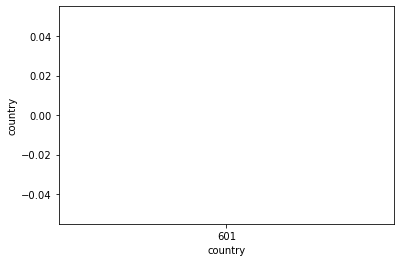

In [14]:
sns.barplot(x=[0], y=[1], 
    data=LEAF_by_country, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

Comment: New 24k battery June 2020 for $5500

#### How fast will the battery lose capacity? capacity_bars bar_11_date bar_11_odometer

In [66]:
surveys['bar_11_odometer'].mean()

28466.61212121212

In [49]:
bar_11 = surveys[['capacity_bars', 'bar_11_odometer', 'bar_11_date']]
bar_11

,capacity_bars,bar_11_odometer,bar_11_date
0,12,NaN,NaN
1,12,NaN,NaN
2,12,NaN,NaN
3,11,60649.0,06/13/2018
4,12,NaN,NaN
5,12,NaN,NaN
6,11,65000.0,04/15/2018
7,9,NaN,NaN
8,6,NaN,NaN
9,8,14000.0,06/01/2016


In [56]:
len(bar_11)

647

In [50]:
# IQR = 16500 - 35000
low_outliers = 16500-(1.5 * 18500)
print(low_outliers)
high_outliers = 35000 + (1.5 * 18500)
print(high_outliers)

-11250.0
62750.0


7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


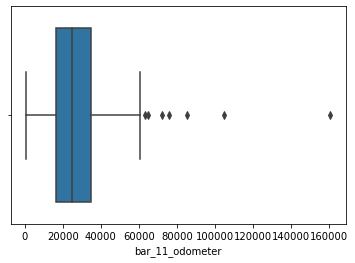

In [51]:
print(len(bar_11.loc[(bar_11.bar_11_odometer < -11250) | (bar_11.bar_11_odometer > 62750)]))
sns.boxplot(bar_11.bar_11_odometer);

In [55]:
len(bar_11.loc[(bar_11.bar_11_odometer > -11250) & (bar_11.bar_11_odometer < 62750)])

158

In [58]:
len(bar_11.loc[(bar_11.bar_11_odometer > -11250)])

165

In [65]:
bar_11_o = bar_11.loc[(bar_11.bar_11_odometer > -11250) & (bar_11.bar_11_odometer < 62750)]
bar_11_o['bar_11_odometer'].median()

24302.5

#### How fast will the battery lose capacity? model_year odometer capacity_bars bar_10_date bar_10_odometer

In [68]:
surveys['bar_10_odometer'].mean()

35230.02857142857

In [69]:
# IQR = 21685 - 39483.75
low_outliers = 21685-(1.5 * 17798.75)
print(low_outliers)
high_outliers = 39483.75 + (1.5 * 17798.75)
print(high_outliers)

-5013.125
66181.875


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


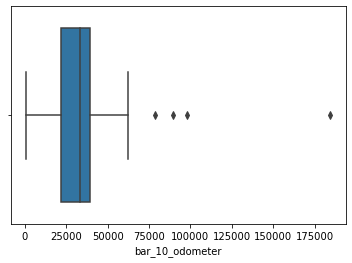

In [70]:
print(len(surveys.loc[(surveys.bar_10_odometer < -5013.125) | (surveys.bar_10_odometer > 66181.875)]))
sns.boxplot(surveys.bar_10_odometer);

In [73]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)])

66

In [75]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125)])

70

In [76]:
bar_10 = surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)]
bar_10

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
9,1283,630,03/03/2020 15:57,2012,LEAF SL,United States,10/2011,1/2012,t,CA,Redondo Beach,90277,38522,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,06/01/2016,14000.0,06/01/2016,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),10,A few times per year,5,Weekly,8,8,20,3,15,0.0,ft,10,50,20,0,0,1,1,Own,NaN,6.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unable to access NissanConnect.
12,1286,633,03/06/2020 16:42,2011,LEAF SV,United States,4/2011,5/2011,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,09/14/2011,14000.0,05/27/2015,23000.0,04/21/2017,36000.0,07/07/2017,40200.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,51,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...
33,515,377,08/10/2013 08:22,2013,NaN,United States,6/2013,7/2013,t,AZ,Phoenix,85015,787,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,08/07/2013,663.0,08/07/2013,663.0,08/10/2013,786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),6,A few times per month,2,Daily,12,8,5,2,20,1200.0,ft,25,60,1,0,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.7,3.6,198.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STK #: DC410870 | VIN #: 1N4AZ0CP1DC410870, LO..."
132,507,75,07/22/2013 13:40,2011,NaN,United States,3/2011,5/2011,t,AZ,Tucson,85710,21397,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,09/21/2012,13146.0,07/16/2013,21397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,3,Most days of the week,8,8,0,3,40,200.0,ft,0,0,3,0,0,1,1,Own,NaN,5.0,2013.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,516,378,08/10/2013 20:30,2011,NaN,United States,6/2011,5/2012,t,NV,Las Vegas,89131,17291,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,01/01/2013,15000.0,05/01/2013,16500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),2,Daily,8,Never,3,8,0,2,30,0.0,ft,70,65,3,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I would really like to get information on rest...
326,561,409,10/10/2013 19:13,2011,NaN

In [80]:
bar_10.bar_10_odometer.mean()

30539.727272727272

In [81]:
surveys.bar_9_odometer.mean()

47332.07894736842